# Solución de Ecuaciones de una variable

Para este primer modulo se llevara a cabo la solucion de Ecuaciones de una variable mediante los siguientes metodos que se iran explicando mas adelante:

_Método de Bisección, método de la Secante, método de Punto fijo, método de Steffensen, método de Aitken y el método de Müller_

Antes de comenzar cabe recalcar lo siguiente, para que los programas aqui definidos tengan su correcto funcionamiento se les debe de alimentar de los siguientes parametros: Función  *$f(x)$* o  *$g(x)$*, puntos o valores iniciales necesarios para aplicar cada método, tolerancia $\epsilon$ que se desea cumplir en la aproximación. Lo cual debe ingresarse en una celda de Jupyter antes de ejecutar el método.


## Método de Bisección

En el analisis numerico el **_Método de Biseccion_** es un algoritmo de búsqueda de raíces que trabaja dividiendo el intervalo a la mitad y seleccionando el subintervalo que contiene a la raíz

### Dependencias y declaraciones comunes

In [1]:
from math import ceil
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import display, display_html, HTML, Latex
import matplotlib.pyplot as plot
import numpy as np

init_printing()

x = symbols('x')

# Método para imprimir la información en forma de tabla
def printTable(columns, data):
    base_table = ( '<table class="table-bordered table-responsive"><thead><tr>{}'
             '</tr></thead><tbody><tr>{}</tr>'
             '</tbody></table>'
    ).format(
        '<th style="width:40px; text-align:center">{}</th>'.format(
            '</th><th style="text-align:center">'.join(j for j in columns)),
        '</tr><tr>'.join(
            '<td style="text-align:center;">{}</td>'.format('</td><td>'.join(j for j in row)) for row in data
        )
    )
    display(HTML(base_table))

### Programa

In [2]:
# Solicitando la función a evaluar
while True:
    try:
        f = sympify(input('Ingrese la función a calcular su raíz: '))
        break
    except SympifyError:
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")
display(Latex('$$ f(x) = ' + latex(f) + ' $$'))

Ingrese la función a calcular su raíz: x**2 - 3*x - 1


<IPython.core.display.Latex object>

In [4]:
# Solicitando el intervalo en el que se evalúa
while True:
    try:
        a = float(sympify(input("Ingrese el límite inferior del intervalo (a): ")).evalf())
        b = float(sympify(input("Ingrese el límite superior del intervalo (b): ")).evalf())
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")
lowerbound = a
higherbound = b

Ingrese el límite inferior del intervalo (a): -1
Ingrese el límite superior del intervalo (b): 0


In [5]:
# Solicitando la tolerancia
while True:
    try:
        tol = abs(float(input("Ingrese la tolerancia deseada (p. e. 1e-6): ")))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")

Ingrese la tolerancia deseada (p. e. 1e-6): 1e-9


Número máximo de iteraciones: 30



i,a,b,c,f(c),Eabs
0,-1.0000000000,0.0000000000,-0.5000000000,0.7500000000,5.0000000000e-01
1,-0.5000000000,0.0000000000,-0.2500000000,-0.1875000000,2.5000000000e-01
2,-0.5000000000,-0.2500000000,-0.3750000000,0.2656250000,1.2500000000e-01
3,-0.3750000000,-0.2500000000,-0.3125000000,0.0351562500,6.2500000000e-02
4,-0.3125000000,-0.2500000000,-0.2812500000,-0.0771484375,3.1250000000e-02
5,-0.3125000000,-0.2812500000,-0.2968750000,-0.0212402344,1.5625000000e-02
6,-0.3125000000,-0.2968750000,-0.3046875000,0.0068969727,7.8125000000e-03
7,-0.3046875000,-0.2968750000,-0.3007812500,-0.0071868896,3.9062500000e-03
8,-0.3046875000,-0.3007812500,-0.3027343750,-0.0001487732,1.9531250000e-03
9,-0.3046875000,-0.3027343750,-0.3037109375,0.0033731461,9.7656250000e-04



Raíz encontrada: -0.30277563724666834
En la iteración 30


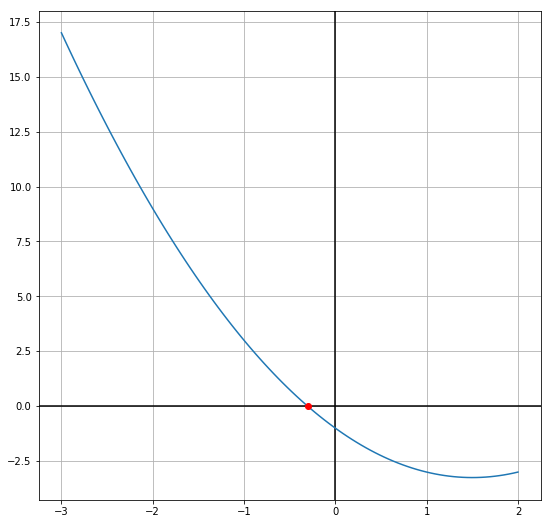

In [6]:
n = ceil(log(abs(higherbound-lowerbound)/tol,2))
print("Número máximo de iteraciones: {}\n".format(n))

a = lowerbound
b = higherbound
fa = f.subs(x, a).evalf()
fb = f.subs(x, b).evalf()
columns = ["i", "a", "b", "c", "f(c)", "Eabs"]
data = []
methodFailed = True
if fb*fa < 0:
    for i in range(n):
        c = (a+b)/2
        fc = f.subs(x, c).evalf()
        e_abs = abs((b-a)/2)
        aux = [str(i), "{:.10f}".format(a), "{:.10f}".format(b),
               "{:.10f}".format(c), "{:.10f}".format(fc), "{:.10e}".format(e_abs)]
        data.append(aux)
        fa = f.subs(x, a).evalf()
        if fc == 0 or e_abs < tol:
            methodFailed = False
            break
        if fc*fa < 0: b = c
        else: a = c
            
    if methodFailed:
        print('El método falló después de {} iteraciones'.format(n))
    else:
#         table = base_table

#         display(HTML(table))
        printTable(columns, data)
        print("\nRaíz encontrada: {}\nEn la iteración {}".format(c, i+1))
        
        fig, ax = plot.subplots(figsize=(9,9));
        ax.axhline(y=0, color="k")
        ax.axvline(x=0, color="k")
        xv = np.linspace(lowerbound-2,higherbound+2,100)
        plot.plot(xv, lambdify(x, f)(xv))
        plot.plot([c],[fc],"ro")
        plot.grid()
        plot.show()
else:
    print("No se puede garantizar la existencia de una raíz en el intervalo proporcionado para la función. [{},{}]"
         .format(lowerbound, higherbound)
         )

## Método de Punto Fijo

El metodo de punto fijo es un algoritmo que trabaja de manera recursiva con iteraciones anteriores, para de esta manera encontrar las raices solucion a una ecuacion que se plantea de la siguiente manera $x = g(x)$  donde  $g(x) - x = f(x)$

### Programa

In [19]:
# Solicitando la función a evaluar
# g(x) = 1 / (x - 3)
while True:
    try:
        g = sympify(input('Ingrese la función g(x): '))
        break
    except SympifyError:
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")
display(Latex('$$ g(x) = ' + latex(g) + ' $$'))

Ingrese la función g(x): sqrt(10/(x+4))


<IPython.core.display.Latex object>

In [21]:
# Solicitando el intervalo en el que se evalúa
while True:
    try:
        p_inicial = float(simpify(input("Ingrese la aproximación inicial: ")).evalf())
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")

Ingrese la aproximación inicial: 1.5


In [22]:
# Solicitando la tolerancia
while True:
    try:
        tol = abs(float(input("Ingrese la tolerancia deseada (p. e. 1e-6): ")))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")

print(tol)

Ingrese la tolerancia deseada (p. e. 1e-6): 1e-10
1e-10


In [23]:
# Solicitando el número máximo de iteraciones
while True:
    try:
        n = abs(int(input("Mayor cantidad de iteraciones posibles: ")))
        break
    except ValueError:
        print("El valor ingresado no es un número o no tiene el formato correcto. Intente de nuevo.")

Mayor cantidad de iteraciones posibles: 25.5
El valor ingresado no es un número. Intente de nuevo.
Mayor cantidad de iteraciones posibles: 25


i,p0,p,Eabs
0,1.5000000000,1.3483997249,1.5160027507e-1
1,1.3483997249,1.3673763720,1.8976647065e-2
2,1.3673763720,1.3649570154,2.4193565888e-3
3,1.3649570154,1.3652647481,3.0773271096e-4
4,1.3652647481,1.3652255942,3.9153952917e-5
5,1.3652255942,1.3652305757,4.9815129088e-6
6,1.3652305757,1.3652299419,6.3379525050e-7
7,1.3652299419,1.3652300225,8.0637385214e-8
8,1.3652300225,1.3652300123,1.0259446404e-8
9,1.3652300123,1.3652300136,1.3053031989e-9



Raíz encontrada: 1.36523001341648
En la iteración 12


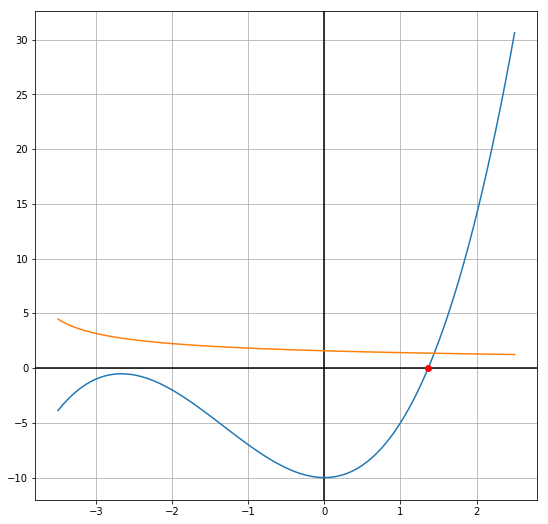

In [24]:
p0 = p_inicial
columns = ['i', 'p0', 'p', 'Eabs']
data = []
f = lambda x: x**3 + 4*x**2 - 10
methodFailed = True
for i in range(n):
    p = g.subs(x, p0).evalf()
    e_abs = abs(p - p0).evalf()
    aux = [str(i), "{:.10f}".format(p0), "{:.10f}".format(p), "{:.10e}".format(e_abs)]
    data.append(aux)
    if e_abs < tol:
        methodFailed = False
        break
    p0 = p
if methodFailed:
    print("El método falló después de {} iteracioens".format(n))
else:
    printTable(columns, data)
    print("\nRaíz encontrada: {}\nEn la iteración {}".format(p, i+1))

    fig, ax = plot.subplots(figsize=(9,9));
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    xv = np.linspace(p_inicial-5,p_inicial+1,100)
    plot.plot(xv, f(xv))
    plot.plot(xv, lambdify(x, g)(xv))
    plot.plot([p],[f(p)],"ro")
    plot.grid()
    plot.show()

# Método de la Secante

En el analisis numerico el metodo de la secante es un metodo para encontrar las raices de una funcion de forma iterativa.

Es una variación del método de Newton-Raphson donde en vez de calcular la derivada de la función en el punto de estudio, teniendo en mente la definición de derivada, se aproxima la pendiente a la recta que une la función evaluada en el punto de estudio y en el punto de la iteración anterior. Este método es de especial interés cuando el coste computacional de derivar la función de estudio y evaluarla es demasiado elevado, por lo que el método de Newton no resulta atractivo.

En otras palabras, el método de la secante es un algoritmo de la raíz de investigación que utiliza una serie de raíces de las líneas secantes para aproximar mejor la raíz de una función f. El método de la secante se puede considerar como una aproximación en diferencias finitas del método de Newton-Raphson. Sin embargo, este método fue desarrollado independientemente de este último.

In [65]:
# Solicitando la función a evaluar
while True:
    try:
        f = sympify(input('Ingrese la función f(x): '))
        break
    except SympifyError:
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")
display(Latex('$$ f(x) = ' + latex(f) + ' $$'))

Ingrese la función f(x): x**2 - 6


<IPython.core.display.Latex object>

In [68]:
while True:
    try:
        p0_inicial = float(sympify(input("Ingrese la aproximación inicial p0: ")).evalf())
        p1_inicial = float(sympify(input("Ingrese la aproximación inicial p1: ")).evalf())
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")

Ingrese la aproximación inicial p0: 3
Ingrese la aproximación inicial p1: 2


In [37]:
# Solicitando la tolerancia
while True:
    try:
        tol = abs(float(input("Ingrese la tolerancia deseada (p. e. 1e-6): ")))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")

Ingrese la tolerancia deseada (p. e. 1e-6): 1e-10


In [38]:
# Solicitando el número máximo de iteraciones
while True:
    try:
        n = abs(int(input("Mayor cantidad de iteraciones posibles: ")))
        break
    except ValueError as err:
        print("El valor ingresado no es un número o no tiene el formato correcto."
              "Error: {}\nIntente de nuevo.".format(err))
print(n)

Mayor cantidad de iteraciones posibles: 50
50


i,p0,p1,p,Eabs
0,3.0000000000,2.0000000000,2.4000000000,4.0000000000e-1
1,2.0000000000,2.4000000000,2.4545454545,5.4545454545e-2
2,2.4000000000,2.4545454545,2.4494382022,5.1072522983e-3
3,2.4545454545,2.4494382022,2.4494896896,5.1487400799e-5
4,2.4494382022,2.4494896896,2.4494897428,5.3135746914e-8
5,2.4494896896,2.4494897428,2.4494897428,5.5910831520e-13



Raíz encontrada: 2.44948974278318
En la iteración 6


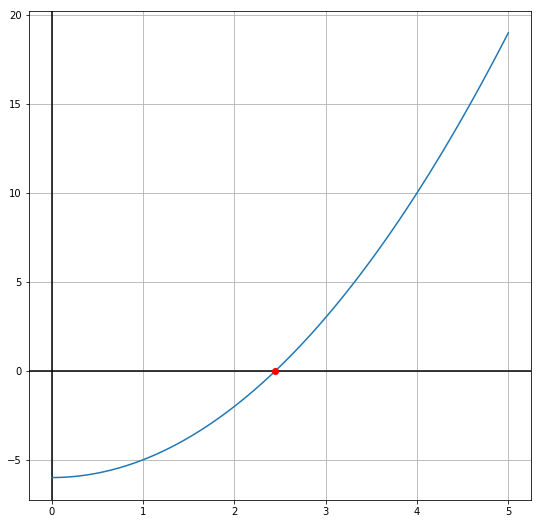

In [69]:
p0 = p0_inicial
p1 = p1_inicial

columns = ["i", "p0", "p1", "p", "Eabs"]
data = []

methodFailed = True
for i in range(n):
    p = (p1 - (f.subs(x, p1) * (p1 - p0))/(f.subs(x, p1) - f.subs(x, p0))).evalf()
    e_abs = abs(p - p1)
    aux = [str(i), "{:.10f}".format(p0), "{:.10f}".format(p1), "{:.10f}".format(p), "{:.10e}".format(e_abs)]
    data.append(aux)
    if e_abs < tol:
        methodFailed = False
        break
    p0, p1 = p1, p
if methodFailed:
    print("El método fallo después de {} iteraciones.".format(n))
else:
    printTable(columns, data)
    print("\nRaíz encontrada: {}\nEn la iteración {}".format(p, i+1))

    fig, ax = plot.subplots(figsize=(9,9));
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    xv = np.linspace(p0_inicial-3,p1_inicial+3,100)
    plot.plot(xv, lambdify(x, f)(xv))
    plot.plot([p],[f.subs(x, p).evalf()],"ro")
    plot.grid()
    plot.show()